big_phi [[0.94171975 0.8874319  0.79765069 0.90961965]
 [0.95812717 0.90966897 0.79913259 0.88962739]
 [0.96464699 0.91505706 0.7365593  0.84580251]
 [0.96246019 0.91258942 0.70117034 0.81844696]
 [0.97878699 0.93985497 0.79264682 0.85247849]
 [0.98129745 0.94144269 0.74871762 0.82316003]
 [0.96559385 0.92891413 0.63618044 0.72459392]
 [0.8319645  0.89415156 0.78404631 0.52019035]
 [0.85461744 0.92020738 0.64954477 0.45764687]
 [0.800371   0.86254195 0.48105167 0.36354483]
 [0.943344   0.93718126 0.92641962 0.8223655 ]
 [0.96450791 0.94819216 0.6067718  0.64482276]
 [0.98938822 0.98231977 0.68262789 0.67833789]
 [0.9904615  0.99420863 0.81472257 0.73451929]
 [0.96729927 0.96523565 0.61776579 0.61678232]
 [0.97950599 0.98725005 0.84484986 0.73866132]
 [0.97581235 0.98171307 0.6530225  0.62255373]
 [0.98127799 0.99321968 0.82174888 0.71339578]
 [0.96099204 0.97561184 0.86916465 0.72809957]
 [0.96282505 0.98293712 0.65217228 0.58530042]
 [0.94583154 0.97241125 0.62485985 0.55001041]
 [0.9

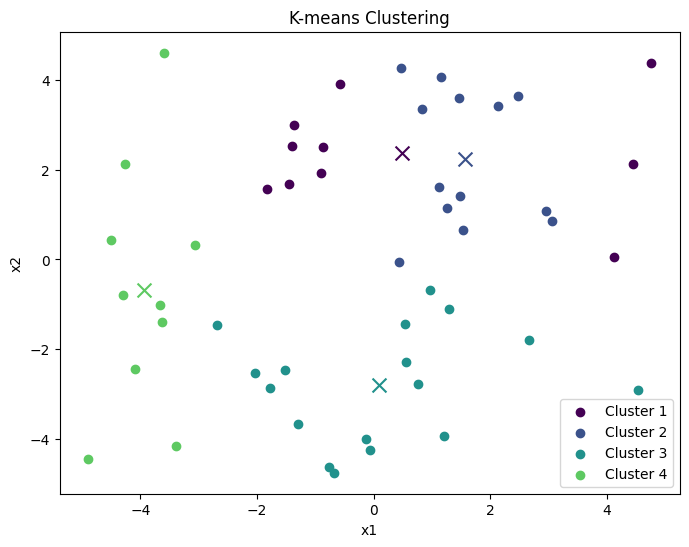

In [8]:
import os
import random
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
# num_data_points = 10

# data_x1 = np.random.normal(loc=0, scale=1, size=num_data_points)
# data_x2 = np.random.normal(loc=0, scale=1, size=num_data_points)
# y = np.random.normal(loc=0, scale=1, size=num_data_points)
# print("x1",x1)
# print("x2",x2)
# print("y",y)
# data = np.column_stack((x1, x2, y))

folder_number = "9"
current_directory = os.getcwd()
# regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 2/" + folder_number + "/"
regression_dataset_2_path = (
    "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Regression/Dataset 2/"
    + folder_number
    + "/"
)

regression_dataset_2_Train_Sample_1 = (
    regression_dataset_2_path + "train50_" + folder_number + ".csv"
)

df = pd.read_csv(regression_dataset_2_Train_Sample_1)
train_x_11 = np.squeeze(np.asanyarray(df[["x1"]]))
train_x_12 = np.squeeze(np.asanyarray(df[["x2"]]))
train_y_1 = np.squeeze(np.asanyarray(df[["y"]]))
data = list(zip(train_x_11, train_x_12, train_y_1))
sorted_data = sorted(data, key=lambda x: x[0])
train_x_11, train_x_12, train_y_1 = zip(*sorted_data)
train_x_1 = []
train_x_1.append(train_x_11)
train_x_1.append(train_x_12)

data = np.column_stack((train_x_11, train_x_12, train_y_1))
# print("data",data)

num_clusters = 4

indices = list(range(data.shape[0]))
random.shuffle(indices)
centroid_indices = indices[:num_clusters]
centroid_indices = np.array(centroid_indices)
# print(centroid_indices)

centroids = data[centroid_indices]
# print("centroids",centroids)

max_iterations = 100
cluster_members = [[] for _ in range(num_clusters)]

for _ in range(max_iterations):
    distances = np.empty((data.shape[0], centroids.shape[0]))
    for i, point in enumerate(data):
        for j, centroid in enumerate(centroids):
            distance = np.sqrt(np.sum((point - centroid) ** 2))
            distances[i, j] = distance

    # print("distances",distances)

    labels = []

    for row in distances:
        min_distance = float('inf')
        min_index = -1
        # print("min_distance ",min_distance," min_index ",min_index)
        for i, distance in enumerate(row):
            if distance < min_distance:
                min_distance = distance
                min_index = i
                # print("min_distance ",min_distance," min_index ",min_index)
        labels.append(min_index)

    labels = np.array(labels)

    # print("labels",labels)
    
    new_centroids = []

    for k in range(num_clusters):
        cluster_points = data[labels == k]
        
        centroid = cluster_points.mean(axis=0)
        
        new_centroids.append(centroid)

    new_centroids = np.array(new_centroids)

    # print("new_centroids",new_centroids)

    if np.all(centroids == new_centroids):
        break
    
    centroids = new_centroids
    cluster_members = [[] for _ in range(num_clusters)]
    centroid_mapping = {tuple(centroid): [] for centroid in centroids}
    for i, label in enumerate(labels):
        cluster_members[label].append(data[i])
        centroid_mapping[tuple(centroids[label])].append(data[i])
    # print("centroids",centroids)

# print("centroids",centroids[0])

plt.figure(figsize=(8, 6))

# for centroid, members in centroid_mapping.items():
#     print(f"Centroid: {centroid}, Cluster Members: {members}")

# print("cluster_members",cluster_members)
centroid_colors = plt.cm.viridis(np.linspace(0, 1, num_clusters+1))
sigma = 100
small_phi = []
k=0
for i, (centroid, members) in enumerate(centroid_mapping.items()):
    cluster_points = np.array(members)
    # print("cluster_points",cluster_points)
    data_x1, data_x2 = cluster_points[:, 0], cluster_points[:, 1]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.scatter(data_x1, data_x2, label=f'Cluster {k+1}',c=centroid_colors[k])
    centroidn = np.array(centroid)
    centroids_x1, centroids_x2 = centroidn[0], centroidn[1]
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.scatter(centroids_x1, centroids_x2, marker='x', s=100, c=centroid_colors[k])
    k=k+1
    sum = 0

big_phi = []
for members in cluster_members:
    cluster_points = np.array(members)
    data_x1, data_x2 = cluster_points[:, 0], cluster_points[:, 1]
    for loop in range(len(data_x1)):
        small_phi = []
        for centroid in centroids:
            centroidn = np.array(centroid)
            centroids_x1, centroids_x2 = centroidn[0], centroidn[1]
            sum = np.square(data_x1[loop]-centroids_x1) + np.square(data_x2[loop]-centroids_x2)
            sum = sum / sigma
            sum = np.exp(-sum)
            small_phi.append(sum)
        big_phi.append(small_phi)

print("big_phi",np.array(big_phi))

# centroids_x1, centroids_x2 =centroids[:, 0], centroids[:, 1]
# plt.scatter(centroids_x1, centroids_x2, c='red', marker='x', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

